In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
df = pd.read_csv("data/spam_sms.csv")
pd.set_option('display.max_colwidth', None)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [25]:
df.shape

(5572, 2)

In [33]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

## Data Preprocessing and Text Cleaning

In [27]:

df['text'] = df['text'].str.replace(f"[{string.punctuation}]", "", regex=True).str.lower()
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_content(text):
    
    filtered = []
    words = text.split()
    for word in words:
        if word.lower() not in stop_words:
            stemmed = stemmer.stem(word.lower())
            filtered.append(stemmed)
    return " ".join(filtered)

df['cleaned_content'] = df['text'].apply(clean_content)
valid_indices = df['cleaned_content'].astype(bool)
filtered_content = df.loc[valid_indices, 'cleaned_content']
y = df.loc[valid_indices, 'label']


vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(filtered_content)
x.shape

(5566, 7139)

## Model Traning and Visualization

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)
model =  LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [29]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9614003590664273


In [30]:
report = classification_report(y_test, y_pred, zero_division=0)
report

'              precision    recall  f1-score   support\n\n         ham       0.96      1.00      0.98       979\n        spam       0.98      0.70      0.81       135\n\n    accuracy                           0.96      1114\n   macro avg       0.97      0.85      0.90      1114\nweighted avg       0.96      0.96      0.96      1114\n'

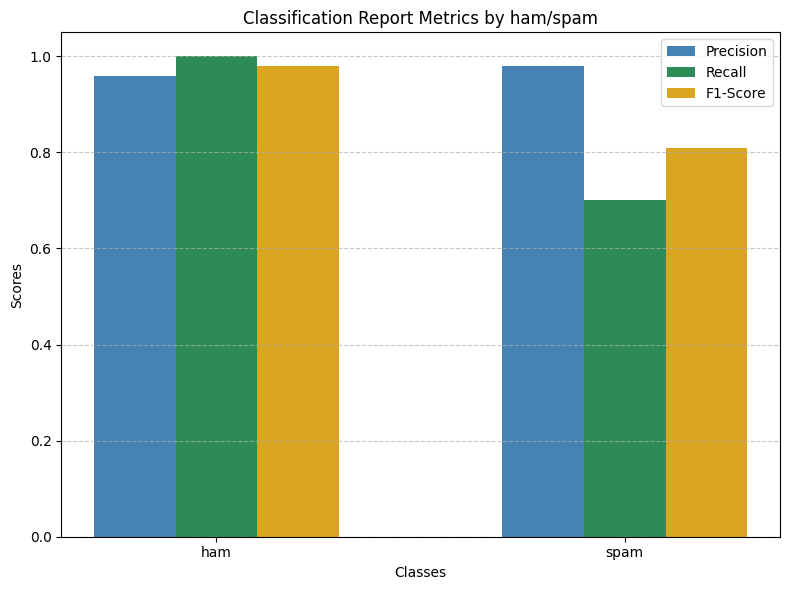

In [31]:


labels = ["ham", "spam"]
precision = [0.96, 0.98]
recall = [1.00, 0.70]
f1_score = [0.98, 0.81]

x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(8, 6))
plt.bar(x - width, precision, width, label="Precision", color="#4682B4")
plt.bar(x, recall, width, label="Recall", color="#2E8B57")
plt.bar(x + width, f1_score, width, label="F1-Score", color="#DAA520")

plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Classification Report Metrics by ham/spam")
plt.xticks(x, labels)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


# Final Result and Conclusion


The model achieved a final accuracy of 96%, demonstrating a high level of overall performance. The bar chart above shows a detailed analysis of the classification report, which provides further insight into the model's strengths and weaknesses. The model exhibits exceptional performance in identifying legitimate messages, with a recall of 1.00 for the 'ham' class, meaning it indeed correctly identified all non-spam messages. Similarly, the precision for 'spam' messages is remarkably high at 0.98, indicating that when the model flags a message as spam, it is highly likely to be correct.